In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
sns.set_theme(color_codes=True)

In [6]:
df=pd.read_csv("./datasets/paises.csv")
df.head()

,code,continent,country,date,total_cases_per_million,total_deaths_per_million,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,hdi
0,AFG,Asia,Afghanistan,09/12/2021,3955.901,183.781,54.422,597.029,9.59,64.83,0.511
1,ALB,Europe,Albania,09/12/2021,70611.786,1088.782,104.871,304.195,10.08,78.57,0.795
2,DZA,Africa,Algeria,09/12/2021,4756.612,137.303,17.348,278.364,6.73,76.88,0.748
3,AND,Europe,Andorra,09/12/2021,249140.316,1719.368,163.755,109.135,7.97,83.73,0.868
4,AGO,Africa,Angola,09/12/2021,1925.701,51.159,23.890,276.045,3.94,61.15,0.581


In [8]:
df.shape

(196, 11)

In [7]:
df.isna().sum()

code                         0
continent                    0
country                      0
date                         0
total_cases_per_million      3
total_deaths_per_million    11
population_density           4
cardiovasc_death_rate       10
diabetes_prevalence          5
life_expectancy              0
hdi                          8
dtype: int64

In [29]:
df_nona = df.dropna(subset = ['total_cases_per_million', 'hdi']) #para quitar na en columnas especificas

In [30]:
df_nona.isna().sum()

code                        0
continent                   0
country                     0
date                        0
total_cases_per_million     0
total_deaths_per_million    7
population_density          2
cardiovasc_death_rate       4
diabetes_prevalence         1
life_expectancy             0
hdi                         0
dtype: int64

In [20]:
model = LinearRegression()

In [31]:
hdi = df_nona['hdi'].array.reshape((-1,1))
total_cases = df_nona['total_cases_per_million']

In [32]:
hdi.isna().sum()

0

In [33]:
model.fit(hdi,total_cases)

LinearRegression()

In [40]:
r_sq = model.score(hdi,total_cases)
print('Resultados de regresion')
print('R2', r_sq)
print('pendiente', model.coef_)
print('interseccion', model.intercept_)

Resultados de regresion
R2 0.4358415861211563
pendiente [266381.72028768]
interseccion -134678.64102464402


Text(0.5, 1.0, 'Regresion IDH - Casos totales')

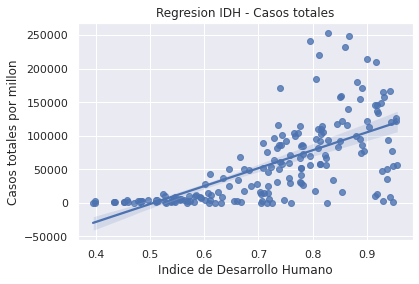

In [46]:
regresion = sns.regplot(x=df_nona['hdi'], y=df_nona['total_cases_per_million'], data=df)
regresion.set_xlabel('Indice de Desarrollo Humano')
regresion.set_ylabel('Casos totales por millon')
regresion.set_title('Regresion IDH - Casos totales')

Text(0, 0.5, 'Casos totales por millon')

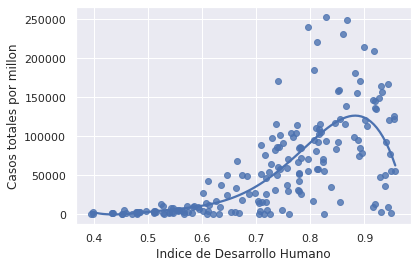

In [43]:
regresion_2 = sns.regplot(x=df_nona['hdi'], y=df_nona['total_cases_per_million'], data=df, order=5, ci=None)
regresion_2.set_xlabel('Indice de Desarrollo Humano')
regresion_2.set_ylabel('Casos totales por millon')